In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Color Recognition in Images
Detects objects / areas with a specific color and create mask.

In [2]:
# dictionary for common color ranges in HSV
color_dict_HSV = {
    'red': [
        (np.array([0, 100, 100]), np.array([10, 255, 255])),
        (np.array([160, 100, 100]), np.array([179, 255, 255]))
    ],
    'green': [(np.array([40, 100, 100]), np.array([80, 255, 255]))],
    'blue': [(np.array([100, 100, 100]), np.array([130, 255, 255]))],
    'yellow': [(np.array([20, 100, 100]), np.array([30, 255, 255]))],
    'orange': [(np.array([5, 100, 100]), np.array([15, 255, 255]))],
    'purple': [(np.array([130, 50, 50]), np.array([160, 255, 255]))],
    'pink': [(np.array([145, 50, 100]), np.array([165, 255, 255]))],
    'brown': [(np.array([10, 100, 20]), np.array([20, 255, 200]))],
    'black': [(np.array([0, 0, 0]), np.array([180, 255, 30]))],
    'white': [(np.array([0, 0, 200]), np.array([180, 30, 255]))]
}

In [3]:
def find_obj(image, color_name):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
    mask = None
    
    for lower, upper in color_dict_HSV[color_name]:
        current_mask = cv2.inRange(hsv, lower, upper)
        if mask is None:
            mask = current_mask
        else:
            mask = cv2.bitwise_or(mask, current_mask)
            
    result = cv2.bitwise_and(image, image, mask=mask) # keep only what the mask allows through 
    
    return result, mask

In [4]:
image = cv2.imread("images/set-shapes.png")

result_green_img, green_mask = find_obj(image, 'green')
result_red_img, red_mask = find_obj(image, 'red')

In [5]:
def visualize(images, titles=None, cmaps=None, figsize=(10, 5)):
    n = len(images)
    
    if titles is None:
        titles = [f'Image {i+1}' for i in range(n)]
    
    if cmaps is None:
        cmaps = [None] * n
    elif isinstance(cmaps, str):
        cmaps = [cmaps] * n
    
    plt.figure(figsize=figsize)
    
    for i, image in enumerate(images):
        if len(image.shape) == 3 and image.shape[2] == 3 and cmaps[i] is None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap=cmaps[i])
        plt.title(f'{titles[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

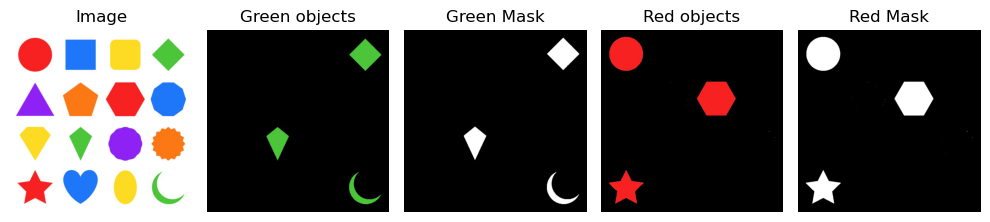

In [6]:
visualize(
    images=[image, result_green_img, green_mask, result_red_img, red_mask], 
    titles=["Image", "Green objects", "Green Mask", "Red objects", "Red Mask"],
    cmaps=[None, None, 'gray', None, 'gray'],  # Use grayscale colormap for the mask
)

## Color detection
1. Read the image
2. Convert the image to HSV color space
3. Define the color range for detection 
4. Create a mask for the defined color
5. Creating contours, applying and tracking masks, and adding text
6. Running the program

In [7]:
def detect_all_colors(image, min_area=300):
    output_image = image.copy()
    
    for color_name, color_ranges in color_dict_HSV.items():
        if color_name == 'red':
            bgr_color = (0, 0, 255)
        elif color_name == 'green':
            bgr_color = (0, 255, 0)
        elif color_name == 'blue':
            bgr_color = (255, 0, 0)
        elif color_name == 'yellow':
            bgr_color = (0, 255, 255)
        elif color_name == 'orange':
            bgr_color = (0, 165, 255)
        elif color_name == 'purple':
            bgr_color = (128, 0, 128)
        elif color_name == 'pink':
            bgr_color = (203, 192, 255)
        elif color_name == 'brown':
            bgr_color = (42, 42, 165)
        elif color_name == 'black':
            bgr_color = (0, 0, 0)
        else:  # white
            bgr_color = (255, 255, 255)
        
        # Find the mask and contour for this color
        _, mask = find_obj(image, color_name)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process each contour
        for i, contour in enumerate(contours):
            area = cv2.contourArea(contour)
            if area > min_area: # ignore noise or small details
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(output_image, (x, y), (x + w, y + h), bgr_color, 2)
                cv2.putText(output_image, color_name, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
                
    return output_image

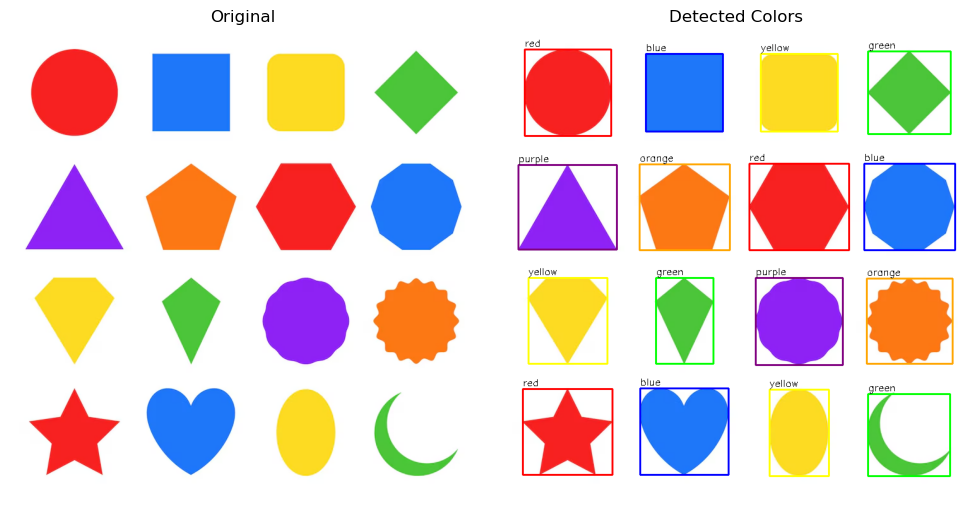

In [8]:
result = detect_all_colors(image)
visualize(
    images= [image, result], 
    titles=['Original', 'Detected Colors'])

References: <br>
https://www.geeksforgeeks.org/color-identification-in-images-using-python-opencv/ <br>
https://agneya.medium.com/color-detection-using-python-and-opencv-8305c29d4a42